In [1]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import os
import folium
import alphashape
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.animation as animation
import imageio
import networkx as nx
import io
from PIL import Image
import time
import sys
from matplotlib import cm
from IPython.display import clear_output
import seaborn as sns
import matplotlib.colors as mcolors
pd.options.mode.copy_on_write = True

%matplotlib inline

In [2]:
from network import Network

In [3]:
dir(Network)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'compute_routes',
 'compute_routes_replace',
 'compute_routes_summary',
 'filter_n_ex',
 'filter_n_pot',
 'get_routes_edges',
 'load_n_ex',
 'load_n_pot',
 'load_trips',
 'plot_n_ex',
 'plot_n_pot',
 'plot_routes',
 'reset_network',
 'reset_routes',
 'reset_sample',
 'run_algo',
 'sample_trips',
 'simulate_demand',
 'weight_network']

In [4]:
n_mtl = Network()
ex = 'Data/Reseaux/ns_EX_Montreal.graphml'
pot = 'Data/Reseaux/ns_POT_Montreal.graphml'
trips = 'Data/od18_extraqit_20250123/od18_extraqit_20250123.csv'
n_mtl.load_n_pot(pot)
n_mtl.load_n_ex(ex)
n_mtl.load_trips(trips)

In [5]:
n_lvl = Network()
ex = 'Data/Reseaux/ns_EX_Laval,Qc.graphml'
pot = 'Data/Reseaux/ns_POT_Laval,Qc.graphml'
trips = 'Data/od18_extraqit_20250123/od18_extraqit_20250123.csv'
n_lvl.load_n_pot(pot)
n_lvl.load_n_ex(ex)
n_lvl.load_trips(trips)

In [6]:
n_beloeil = Network()
ex = 'Data/Reseaux/ns_EX_Beloeil,Qc+Mont-Saint-Hilaire.graphml'
pot = 'Data/Reseaux/ns_POT_Beloeil,Qc+Mont-Saint-Hilaire.graphml'
trips = 'Data/od18_extraqit_20250123/od18_extraqit_20250123.csv'
n_beloeil.load_n_pot(pot)
n_beloeil.load_n_ex(ex)
n_beloeil.load_trips(trips)

In [32]:
n_ut = Network(crs = 32631)
ex = 'Data/Reseaux/ns_EX_Utrecht.graphml'
pot = 'Data/Reseaux/ns_POT_Utrecht.graphml'
n_ut.load_n_pot(pot)
n_ut.load_n_ex(ex)

In [94]:
n_am = Network(crs = 32631)
ex = 'Data/Reseaux/ns_EX_Amsterdam.graphml'
pot = 'Data/Reseaux/ns_POT_Amsterdam.graphml'
n_am.load_n_pot(pot)
n_am.load_n_ex(ex)

In [106]:
networks = [n_mtl,n_lvl,n_beloeil,n_ut,n_am]
r_fac = np.linspace(0,1,6)
summaries = []
for j,r in enumerate(r_fac):
    print(j)
    for j,n in enumerate(networks):
        n.reset_network()
        n.weight_network(r)
        n.reset_sample()
        n.reset_routes()
        n.simulate_demand(size = 1000)
        n.compute_routes(n.n_pot)
        n.get_routes_edges(n.n_pot)
        n.compute_routes_summary()
        summaries.append(n.routes_summary)

0


  0%|          | 0/1000 [00:00<?, ?it/s]

88.2 % of solved routes,  0.8  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

94.3 % of solved routes,  0.8999999999999999  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

99.0 % of solved routes,  0.1  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

77.7 % of solved routes,  0.0  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

76.7 % of solved routes,  0.2  % of static routes
1


  0%|          | 0/1000 [00:00<?, ?it/s]

88.2 % of solved routes,  0.4  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

93.10000000000001 % of solved routes,  0.4  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

98.6 % of solved routes,  0.4  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

81.69999999999999 % of solved routes,  0.0  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

77.9 % of solved routes,  0.1  % of static routes
2


  0%|          | 0/1000 [00:00<?, ?it/s]

88.4 % of solved routes,  0.5  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

92.10000000000001 % of solved routes,  0.4  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

98.9 % of solved routes,  0.2  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

79.2 % of solved routes,  0.2  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

76.1 % of solved routes,  0.3  % of static routes
3


  0%|          | 0/1000 [00:00<?, ?it/s]

88.5 % of solved routes,  0.4  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

92.7 % of solved routes,  0.7000000000000001  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

99.0 % of solved routes,  0.2  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

79.69999999999999 % of solved routes,  0.0  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

76.8 % of solved routes,  0.3  % of static routes
4


  0%|          | 0/1000 [00:00<?, ?it/s]

89.4 % of solved routes,  0.5  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

93.9 % of solved routes,  1.5  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

99.4 % of solved routes,  0.4  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

81.89999999999999 % of solved routes,  0.2  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

80.69999999999999 % of solved routes,  0.2  % of static routes
5


  0%|          | 0/1000 [00:00<?, ?it/s]

88.1 % of solved routes,  0.4  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

93.9 % of solved routes,  0.8999999999999999  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

98.8 % of solved routes,  0.6  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

77.7 % of solved routes,  0.0  % of static routes


  0%|          | 0/1000 [00:00<?, ?it/s]

73.1 % of solved routes,  0.6  % of static routes


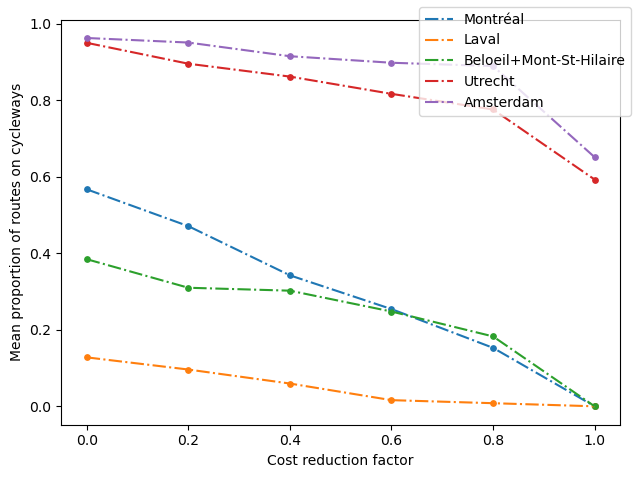

In [147]:
labels = ['Montréal','Laval','Beloeil+Mont-St-Hilaire','Utrecht','Amsterdam']
fig, ax = plt.subplots()
for i,n in enumerate(networks):
    ax.plot(r_fac,[summary.prop_cycleway.median() for summary in summaries[i::len(networks)]], label = labels[i], linestyle = '-.')
    ax.scatter(r_fac,[summary.prop_cycleway.median() for summary in summaries[i::len(networks)]],s = 15)

fig.legend()
ax.set_xlabel('Cost reduction factor')
ax.set_ylabel('Mean proportion of routes on cycleways')
fig.tight_layout()
fig.savefig('Figures/cities_comparison.png')

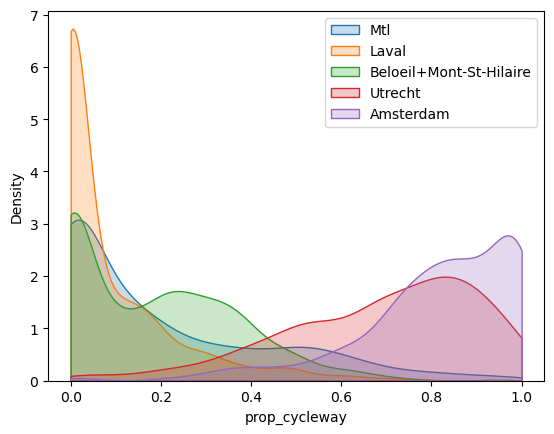

In [101]:
labels = ['Mtl','Laval','Beloeil+Mont-St-Hilaire','Utrecht','Amsterdam']
fig, ax = plt.subplots()
for i,summary in enumerate(summaries):
    sns.kdeplot(summary.prop_cycleway, ax = ax, cut = 0, fill = True, label = labels[i])

ax.legend()

In [ ]:
n.reset_network()
n.reset_routes()
n.reset_sample()
n.sample_trips(sample_size=1000)
r_fac = np.linspace(0,1,11)

In [ ]:
counts_all = []
for i,f in enumerate(r_fac):
    n.weight_network(cycleway_reduc_factor=f)
    n.reset_routes()
    n.compute_routes(n.n_pot)
    n.get_routes_edges(n.n_pot)
    n.compute_routes_summary()
    bins = np.linspace(0,1,101)
    counts,_ = np.histogram(n.routes_summary.prop_cycleway,bins = bins)
    counts = np.reshape(counts, (len(counts),1))
    counts_all.append(counts)

In [ ]:
counts_all_stacked = np.hstack(counts_all)
fig, ax = plt.subplots()
im = ax.imshow(counts_all_stacked,extent=[0,1,0,1],origin = 'lower',norm = 'log')
cbar = fig.colorbar(im, ax=ax)